# Implémentation d'un perceptron multi-couche en numpy

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

### Générer des données aléatoirement

In [24]:
def data():
    np.random.seed(1)
    X = np.random.rand(2, 10)                                # Générer des données aléatoires de 2 dimensions et 10 exemples
    y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])             # Attribuer des étiquettes à chaque classe de manière équitable
    y = y.reshape(1, y.shape[0])                             # Redimensionner y pour qu'il soit de la forme (1, 10)
    return X, y

'''
# Pour tester pour des données fixes
def data():
    X = np.array([[,], [,], [,], [,], [,], [,], [,], [,], [,], [,]])
    X = X.reshape(2, X.shape[0])                             # Redimensionner X pour qu'il soit de la forme (2, 10)
    y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])             # Attribuer des étiquettes à chaque classe de manière équitable
    y = y.reshape(1, y.shape[0])                             # Redimensionner y pour qu'il soit de la forme (1, 10)
    return X, y
'''

"\n# Pour tester pour des données fixes\ndef data():\n    X = np.array([[,], [,], [,], [,], [,], [,], [,], [,], [,], [,]])\n    X = X.reshape(2, X.shape[0])                             # Redimensionner X pour qu'il soit de la forme (2, 10)\n    y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])             # Attribuer des étiquettes à chaque classe de manière équitable\n    y = y.reshape(1, y.shape[0])                             # Redimensionner y pour qu'il soit de la forme (1, 10)\n    return X, y\n"

### La fonction Loss

In [25]:
def loss(y_true, y_pred):
    return np.linalg.norm((y_true - y_pred)**2, axis=1) / 2    # Fonction de coût 

def plot_loss(losses):                                         # Fonction pour tracer les courbes de perte 
    plt.plot(losses)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

### Architecture du réseau

In [26]:
def layers_neur(layers):
    parametres = {}                                                                # Initialiser un dictionnaire vide pour stocker les paramètres
    C = len(layers)                                                                # Nombre de couches
    for c in range(1, C):
        parametres['W' + str(c)] = np.random.randn(layers[c], layers[c - 1])       # Initialiser les poids aléatoirement
        parametres['b' + str(c)] = np.random.randn(layers[c], 1)                   # Initialiser les biais aléatoirement
    return parametres

### Forward

In [27]:
def forward_propagation(X, parametres):
    activations = {'A0': X}                                                                               # Initialiser un dictionnaire vide pour stocker les activations
    C = len(parametres) // 2                                                                              # Nombre de couches
    for c in range(1, C + 1):
        Z = parametres['W' + str(c)].dot(activations['A' + str(c - 1)]) + parametres['b' + str(c)]        # Calculer Z = W * A + b
        activations['A' + str(c)] = 1 / (1 + np.exp(-Z))                                                  # Calculer l'activation A = sigmoïde(Z)
    return activations

### Backpropagation

In [28]:
def back_propagation(y, parametres, activations):
    m = y.shape[1]                                                                                                               # Nombre de données
    C = len(parametres) // 2                                                                                                     # Nombre de couches
    dZ = activations['A' + str(C)] - y                                                                                           # Calculer dZ = A - y
    gradients = {}                                                                                                               # Initialiser un dictionnaire vide pour stocker les gradients
    for c in reversed(range(1, C + 1)):
        gradients['dW' + str(c)] = 1/m * np.dot(dZ, activations['A' + str(c - 1)].T)                                             # Calculer dW = 1/m * dZ * A.T
        gradients['db' + str(c)] = 1/m * np.sum(dZ, axis=1, keepdims=True)                                                       # Calculer db = 1/m * somme(dZ)
        if c > 1:
            dZ = np.dot(parametres['W' + str(c)].T, dZ) * activations['A' + str(c - 1)] * (1 - activations['A' + str(c - 1)])     # Calculer dZ = W.T * dZ * sigmoïde'(A)
    return gradients

### Incrémentation

In [29]:
def update(gradients, parametres, learning_rate):
    C = len(parametres) // 2                                                                             # Nombre de couches
    for c in range(1, C + 1):
        parametres['W' + str(c)] = parametres['W' + str(c)] - learning_rate * gradients['dW' + str(c)]   # Mettre à jour les poids
        parametres['b' + str(c)] = parametres['b' + str(c)] - learning_rate * gradients['db' + str(c)]   # Mettre à jour les biais
    return parametres

### Entrainement du modèle

In [30]:
def train(X, y, layers, learning_rate, num_iterations, batch_size):
    parametres = layers_neur(layers)                                                                 # Initialiser les paramètres
    losses = []                                                                                      # Initialiser la liste des pertes
    #accuracy =[]                                                                                    # Initialiser la liste des précisions
    for i in tqdm(range(num_iterations)):
        for j in range(0, X.shape[1], batch_size):                                                   # Parcourir les données par lots + descente de gradient stochastique
            activations = forward_propagation(X[:, j:j+batch_size], parametres)                      # Calculer les activations
            gradients = back_propagation(y[:, j:j+batch_size], parametres, activations)              # Calculer les gradients
            parametres = update(gradients, parametres, learning_rate)                                # Mettre à jour les paramètres
        activations = forward_propagation(X, parametres)                                             # Calculer les activations
        losses.append(loss(y, activations['A' + str(len(layers) - 1)]))                              # Calculer la perte
        #accuracy.append(np.mean(np.round(activations['A' + str(len(layers) - 1)]) == y))            # Calculer la précision
        if i % 1000 == 0:
            print(f'Loss = {losses[-1]}')                                                            # Afficher la perte et la précision à chaque 1000 itérations
    return parametres, losses

### La frontière de décision

In [31]:
def boundary(X, y, parametres):
    xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))                             # Créer une grille
    X_test = np.c_[xx.ravel(), yy.ravel()]                                                           # Créer un ensemble de données de test
    activations = forward_propagation(X_test.T, parametres)                                          # Calculer les activations
    y_pred = np.round(activations['A' + str(len(layers) - 1)])                                       # Prédire les classes
    plt.figure()
    plt.title(f"Classification avec {len(layers)-2} couches cachées")
    plt.contourf(xx, yy, np.resize(y_pred, xx.shape), cmap='Spectral', alpha=0.5)                    # Tracer la frontière de décision 
    plt.scatter(X[0, :], X[1, :], c=y, cmap='Spectral')                                              # Tracer les données d'entrainement
    plt.show()

### Paramètres du modèle

In [32]:
X, y = data()                                   # Générer les données d'entrainement aléatoirement
layers = [2, 2, 3, 1]                           # Définir le nombre de neurones par couche
learning_rate = 0.1                             # Définir le taux d'apprentissage
num_iterations = 20000                          # Définir le nombre d'itérations
batch_size = 1                                  # Définir la taille des lots

  0%|          | 45/20000 [00:00<01:28, 225.03it/s]

Loss = [0.46949541]


  5%|▌         | 1050/20000 [00:02<00:42, 447.97it/s]

Loss = [0.40131709]


 10%|█         | 2029/20000 [00:23<01:04, 279.89it/s]

Loss = [0.3985363]


 15%|█▌        | 3049/20000 [00:26<01:08, 248.46it/s]

Loss = [0.28598369]


 20%|██        | 4045/20000 [00:30<00:41, 384.66it/s]

Loss = [0.29572429]


 25%|██▌       | 5045/20000 [2:41:25<00:56, 266.72it/s]   

Loss = [0.29574759]


 30%|███       | 6051/20000 [2:41:28<00:37, 374.11it/s]

Loss = [0.28596966]


 35%|███▌      | 7054/20000 [2:41:30<00:31, 412.93it/s]

Loss = [0.4147028]


 40%|████      | 8019/20000 [2:41:35<02:06, 94.48it/s] 

Loss = [0.00050136]


 45%|████▌     | 9067/20000 [2:41:39<00:31, 352.26it/s]

Loss = [0.00014541]


 50%|█████     | 10031/20000 [2:41:44<00:48, 204.07it/s]

Loss = [7.05848037e-05]


 55%|█████▌    | 11015/20000 [2:41:47<00:41, 215.60it/s]

Loss = [4.16318299e-05]


 60%|██████    | 12057/20000 [2:41:51<00:25, 312.57it/s]

Loss = [2.73416112e-05]


 65%|██████▌   | 13042/20000 [2:41:53<00:16, 414.44it/s]

Loss = [1.92534307e-05]


 70%|███████   | 14081/20000 [2:41:56<00:12, 461.84it/s]

Loss = [1.4244296e-05]


 76%|███████▌  | 15109/20000 [2:41:58<00:09, 535.90it/s]

Loss = [1.09354315e-05]


 80%|████████  | 16076/20000 [2:41:59<00:07, 540.67it/s]

Loss = [8.64050056e-06]


 85%|████████▌ | 17066/20000 [2:42:02<00:05, 524.97it/s]

Loss = [6.98668537e-06]


 90%|█████████ | 18044/20000 [2:42:04<00:05, 386.67it/s]

Loss = [5.75745762e-06]


 95%|█████████▌| 19037/20000 [2:42:07<00:02, 360.45it/s]

Loss = [4.82019298e-06]


100%|██████████| 20000/20000 [2:42:10<00:00,  2.06it/s] 


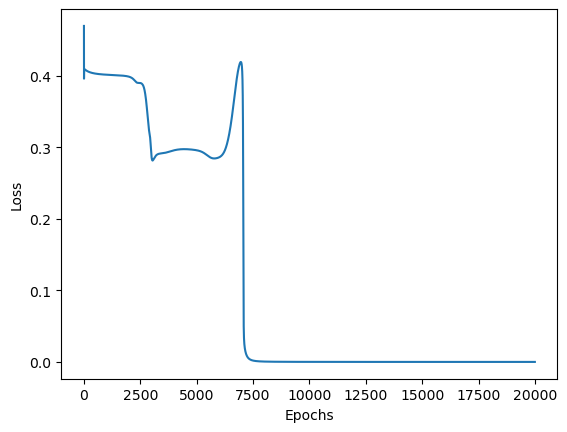

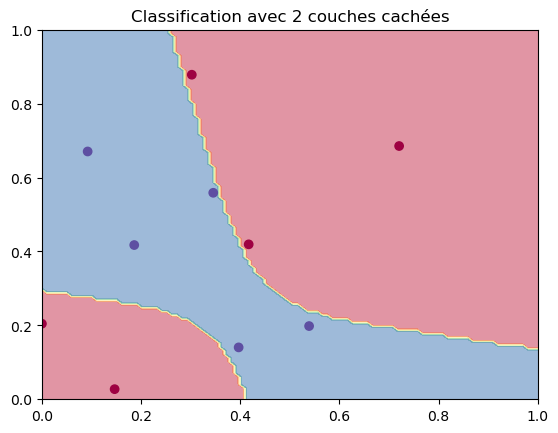

In [33]:
parametres, losses= train(X, y, layers, learning_rate, num_iterations, batch_size)                 # Entrainement du modèle
plot_loss(losses)                                                                                  # Afficher la perte et la précision
boundary(X, y, parametres)                                                                         # Afficher la frontière de décision